<a href="https://colab.research.google.com/github/Zulema-Rodriguez/Challenge2-TelecomX-ALURA/blob/main/Challenge_Telecomx_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1FQibJaUwf91phcRCWcrJFNbwKfB8BMZ_'
gdown.download(url, 'archivo.csv', quiet=False)

import pandas as pd
df = pd.read_csv('archivo.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1FQibJaUwf91phcRCWcrJFNbwKfB8BMZ_
To: /content/archivo.csv
100%|██████████| 869k/869k [00:00<00:00, 9.11MB/s]


,ID_cliente,Churn,género,adulto_mayor,pareja,dependientes,antigüedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,protección_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,contrato,factura_electronica,método_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,mujer,0,1,1,9,1,0,dsl,...,0,1,1,0,contrato anual,1,cheque por correo,65.6,593.30,2.186667
1,0003-MKNFE,0,hombre,0,0,0,9,1,1,dsl,...,0,0,0,1,mes a mes,0,cheque por correo,59.9,542.40,1.996667
2,0004-TLHLJ,1,hombre,0,0,0,4,1,0,fibra óptica,...,1,0,0,0,mes a mes,1,cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,1,hombre,1,1,0,13,1,0,fibra óptica,...,1,0,1,1,mes a mes,1,cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,mujer,1,1,0,3,1,0,fibra óptica,...,0,1,1,0,mes a mes,1,cheque por correo,83.9,267.40,2.796667


In [5]:
list(df.columns)

['ID_cliente',
 'Churn',
 'género',
 'adulto_mayor',
 'pareja',
 'dependientes',
 'antigüedad_meses',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_online',
 'respaldo_online',
 'protección_dispositivo',
 'soporte_tecnico',
 'tv_streaming',
 'peliculas_streaming',
 'contrato',
 'factura_electronica',
 'método_pago',
 'cargos_mensuales',
 'cargos_totales',
 'Cuentas_Diarias']

###Eliminacion de columnas irrelevantes

In [6]:
df=df.drop(columns=['ID_cliente'])

In [7]:
print(df.columns)

Index(['Churn', 'género', 'adulto_mayor', 'pareja', 'dependientes',
       'antigüedad_meses', 'servicio_telefonico', 'lineas_multiples',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'protección_dispositivo', 'soporte_tecnico', 'tv_streaming',
       'peliculas_streaming', 'contrato', 'factura_electronica', 'método_pago',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')


##Encoding

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
print(df_encoded.head())

   Churn  adulto_mayor  pareja  dependientes  antigüedad_meses  \
0      0             0       1             1                 9   
1      0             0       0             0                 9   
2      1             0       0             0                 4   
3      1             1       1             0                13   
4      1             1       1             0                 3   

   servicio_telefonico  lineas_multiples  seguridad_online  respaldo_online  \
0                    1                 0                 0                1   
1                    1                 1                 0                0   
2                    1                 0                 0                0   
3                    1                 0                 0                1   
4                    1                 0                 0                0   

   protección_dispositivo  ...  cargos_totales  Cuentas_Diarias  género_mujer  \
0                       0  ...          593.30 

In [10]:
print(df_encoded.columns)

Index(['Churn', 'adulto_mayor', 'pareja', 'dependientes', 'antigüedad_meses',
       'servicio_telefonico', 'lineas_multiples', 'seguridad_online',
       'respaldo_online', 'protección_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'factura_electronica',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias', 'género_mujer',
       'servicio_internet_fibra óptica', 'servicio_internet_sin servicio',
       'contrato_contrato bienal', 'contrato_mes a mes',
       'método_pago_cheque por correo',
       'método_pago_tarjeta de crédito (automática)',
       'método_pago_transferencia bancaria (automática)'],
      dtype='object')


In [11]:
if 'ID_cliente' in df.columns:
    df = df.drop(columns=['ID_cliente'])


In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [13]:
print(df_encoded.head())


   Churn  adulto_mayor  pareja  dependientes  antigüedad_meses  \
0      0             0       1             1                 9   
1      0             0       0             0                 9   
2      1             0       0             0                 4   
3      1             1       1             0                13   
4      1             1       1             0                 3   

   servicio_telefonico  lineas_multiples  seguridad_online  respaldo_online  \
0                    1                 0                 0                1   
1                    1                 1                 0                0   
2                    1                 0                 0                0   
3                    1                 0                 0                1   
4                    1                 0                 0                0   

   protección_dispositivo  ...  cargos_totales  Cuentas_Diarias  género_mujer  \
0                       0  ...          593.30 

In [14]:
print(df_encoded.columns)
print(f"Número total de columnas: {len(df_encoded.columns)}")

Index(['Churn', 'adulto_mayor', 'pareja', 'dependientes', 'antigüedad_meses',
       'servicio_telefonico', 'lineas_multiples', 'seguridad_online',
       'respaldo_online', 'protección_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'factura_electronica',
       'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias', 'género_mujer',
       'servicio_internet_fibra óptica', 'servicio_internet_sin servicio',
       'contrato_contrato bienal', 'contrato_mes a mes',
       'método_pago_cheque por correo',
       'método_pago_tarjeta de crédito (automática)',
       'método_pago_transferencia bancaria (automática)'],
      dtype='object')
Número total de columnas: 25


##Verficación de la proporción de cancelación

In [15]:
proporcion = df_encoded['Churn'].value_counts(normalize=True)

print("Proporción de cada clase en Churn:")
print(proporcion)

Proporción de cada clase en Churn:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


##Balanceo de clsases

In [16]:
from imblearn.over_sampling import SMOTE


In [17]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar las nuevas proporciones
print(pd.Series(y_resampled).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


##Análisis de correlación

In [18]:
import seaborn as sns
import matplotlib.pyplot as pltb


In [19]:
correlation_matrix = df_encoded.corr()


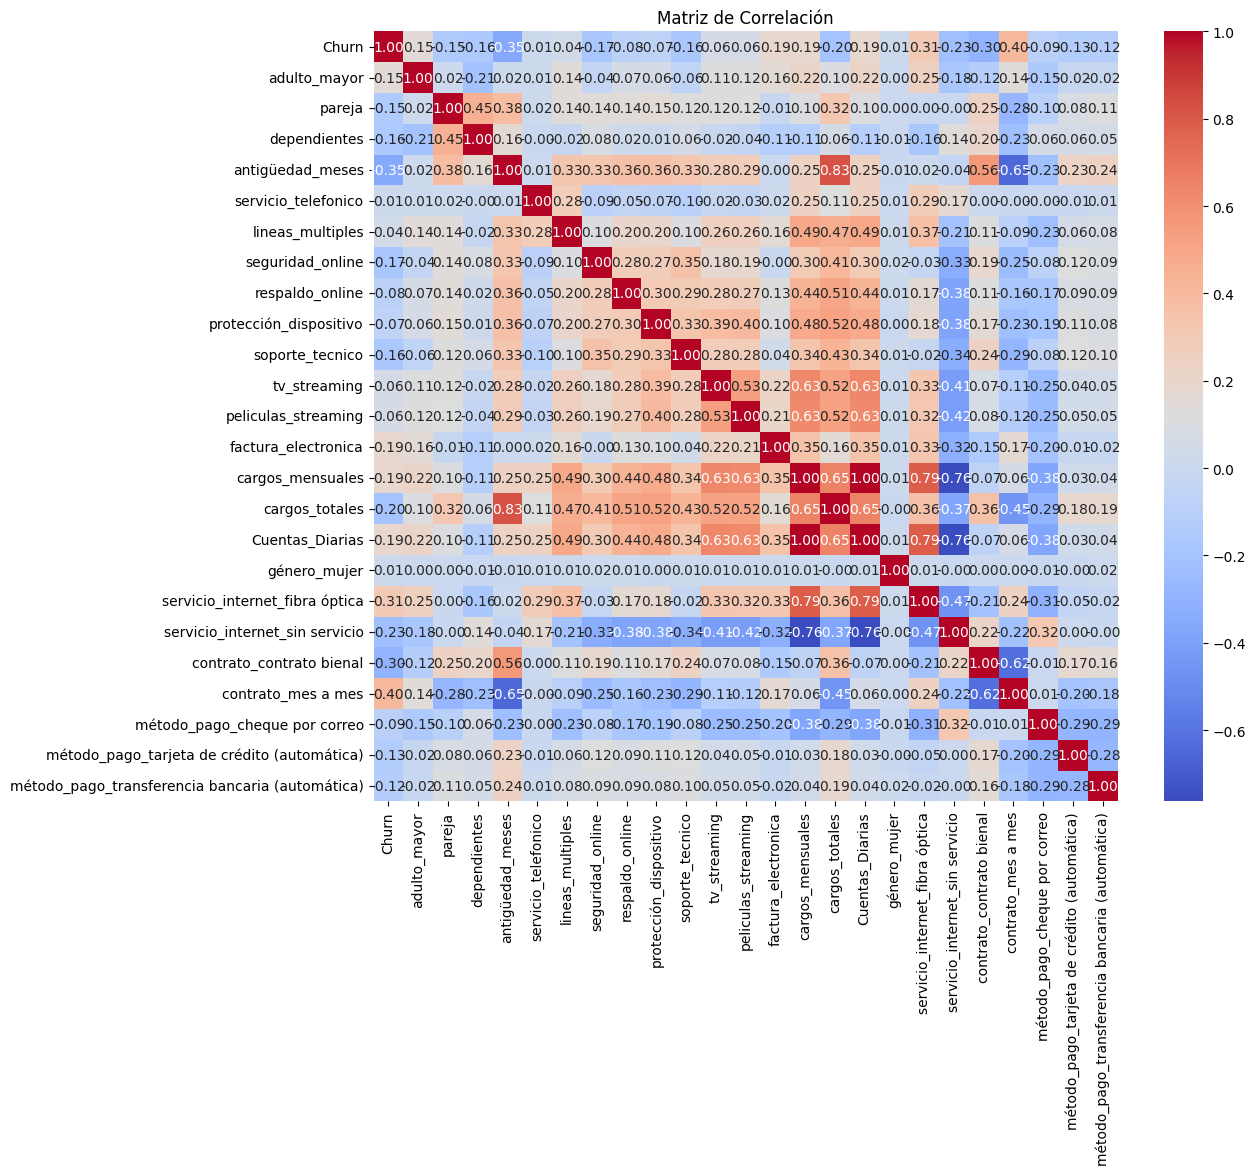

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()


In [21]:
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("Variables más correlacionadas con Churn:")
print(churn_corr)

Variables más correlacionadas con Churn:
Churn                                              1.000000
contrato_mes a mes                                 0.404565
servicio_internet_fibra óptica                     0.307463
Cuentas_Diarias                                    0.192858
cargos_mensuales                                   0.192858
factura_electronica                                0.191454
adulto_mayor                                       0.150541
tv_streaming                                       0.063254
peliculas_streaming                                0.060860
lineas_multiples                                   0.040033
servicio_telefonico                                0.011691
género_mujer                                       0.008545
protección_dispositivo                            -0.066193
respaldo_online                                   -0.082307
método_pago_cheque por correo                     -0.090773
método_pago_transferencia bancaria (automática)   -0.118136

## Analisis dirigido

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


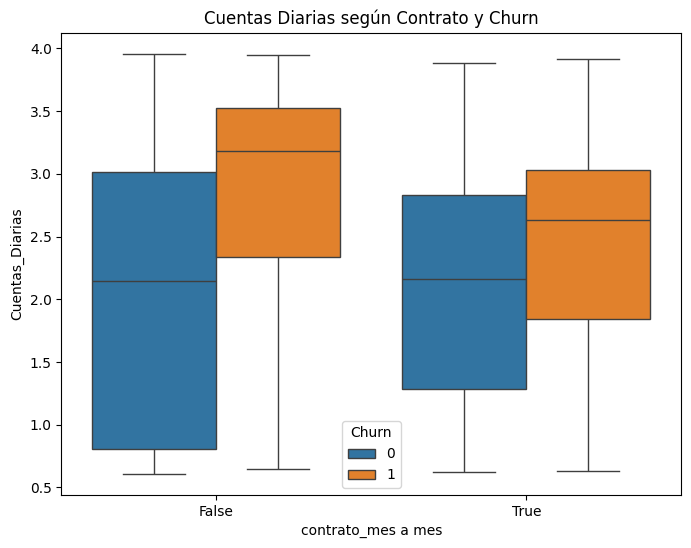

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='contrato_mes a mes', y='Cuentas_Diarias', hue='Churn', data=df_encoded)
plt.title("Cuentas Diarias según Contrato y Churn")
plt.show()


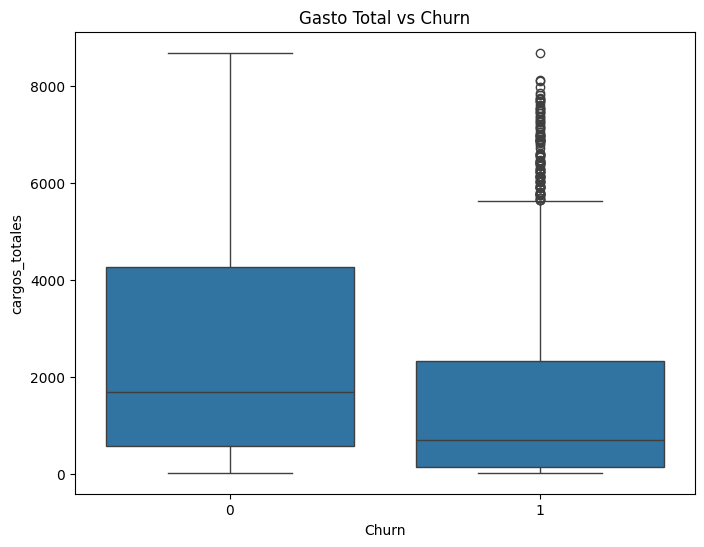

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='cargos_totales', data=df_encoded)
plt.title("Gasto Total vs Churn")
plt.show()


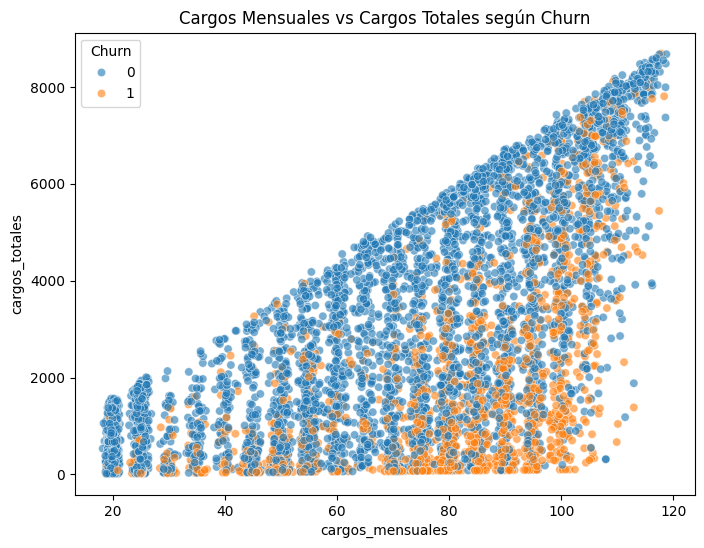

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cargos_mensuales', y='cargos_totales', hue='Churn', data=df_encoded, alpha=0.6)
plt.title("Cargos Mensuales vs Cargos Totales según Churn")
plt.show()


##Separación de datos

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
# X_resampled y y_resampled vienen del balanceo con SMOTE
# Dividir en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


In [28]:
# Verificar tamaños
print(f"Tamaño de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño de prueba: {X_test.shape[0]} filas")

Tamaño de entrenamiento: 7228 filas
Tamaño de prueba: 3098 filas


##Creación de modelo

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [30]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,       # Número de árboles
    random_state=42,        # Para reproducibilidad
    max_depth=None,         # Profundidad máxima de los árboles
    min_samples_split=2,    # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,     # Mínimo de muestras en una hoja
    n_jobs=-1               # Usa todos los núcleos de CPU disponibles
)

###Entrenar el modeo

In [31]:
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

###Evaluación del modelo

In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)



In [33]:
# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Random Forest: {accuracy:.4f}")


Accuracy del Random Forest: 0.8386


In [34]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)



Matriz de Confusión:
[[1244  305]
 [ 195 1354]]


In [35]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.82      0.87      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



In [36]:
# AUC-ROC
y_prob = rf_model.predict_proba(X_test)[:,1]  # Probabilidades de clase 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {roc_auc:.4f}")

AUC-ROC: 0.9208


###Importancia de las variables

In [37]:
importances = rf_model.feature_importances_
feature_names = X_train.columns


In [38]:
# Crear un DataFrame para visualizar
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("Variables más importantes según Random Forest:")
print(importance_df.head(10))  # Mostrar top 10

Variables más importantes según Random Forest:
                          Variable  Importancia
20              contrato_mes a mes     0.129289
14                  cargos_totales     0.122571
13                cargos_mensuales     0.119439
3                 antigüedad_meses     0.117177
15                 Cuentas_Diarias     0.113411
17  servicio_internet_fibra óptica     0.056947
9                  soporte_tecnico     0.034819
19        contrato_contrato bienal     0.033816
6                 seguridad_online     0.030439
2                     dependientes     0.028628


###Fraficos

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc
)



####MATRIZ DE CONFUSIÓN

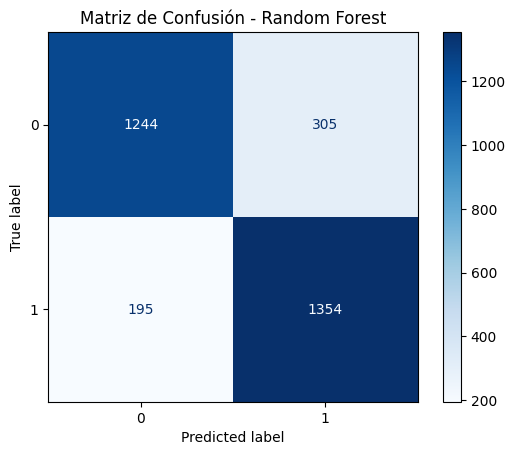

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()



###Reporte de clasificación

In [41]:
from sklearn.metrics import classification_report

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.82      0.87      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



###Curva ROC/AUC

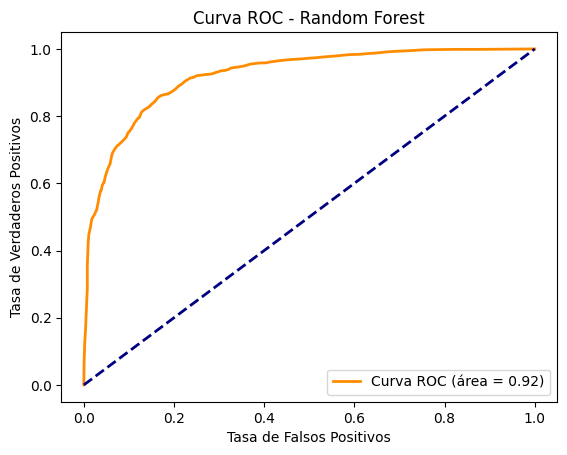

In [42]:
# Calcular las probabilidades para la clase positiva
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

##Evaluación de los modelos

####Evaluación del modelo: Regresión Logística

In [43]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


####Predicción del modelo

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [45]:
# Regresión Logística con escalado interno
logreg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])



In [46]:
# Entrenar
logreg_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [47]:
# Predicciones y probabilidades para tu evaluación
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:,1]

In [48]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:, 1]


####Matrices principales

In [49]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)


In [50]:
print("=== Resultados - Regresión Logística ===")
print(f"Exactitud (Accuracy): {accuracy_logreg:.4f}")
print(f"Precisión: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")


=== Resultados - Regresión Logística ===
Exactitud (Accuracy): 0.8157
Precisión: 0.8015
Recall: 0.8393
F1-score: 0.8199


####Reporte de clasificación

In [51]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1549
           1       0.80      0.84      0.82      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



####Matriz de confusión

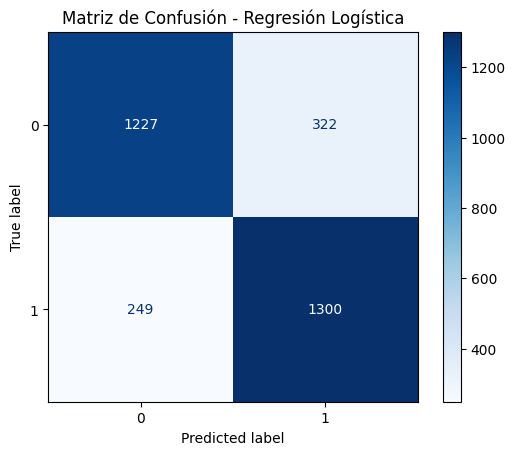

In [52]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                                     display_labels=logreg_model.classes_)
disp_logreg.plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


###Curva de ROC-AUC

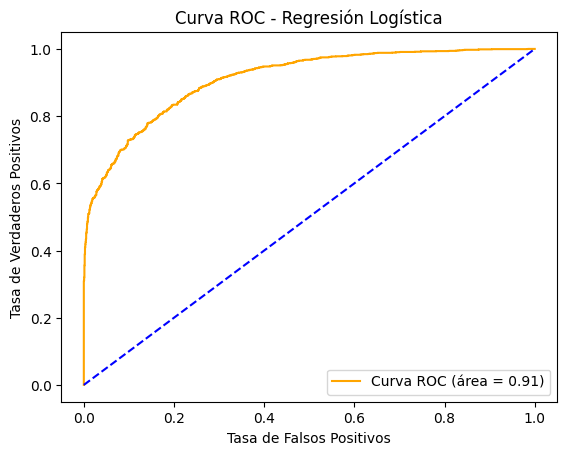

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange",
         label=f"Curva ROC (área = {roc_auc_logreg:.2f})")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

####Analisis crítico y comparación de modelos

Se evaluaron dos modelos de clasificación: Regresión Logística y Random Forest, considerando las métricas de exactitud, precisión, recall, F1-score, matriz de confusión y curva ROC-AUC.

🔹 Regresión Logística

Exactitud (Accuracy): 0.8157

Precisión: 0.8015

Recall: 0.8393

F1-score: 0.8199

Matriz de confusión:

Verdaderos negativos (TN): 1244

Falsos positivos (FP): 305

Falsos negativos (FN): 195

Verdaderos positivos (TP): 1354


Curva ROC-AUC: cercano a 0.85-0.88


Interpretación:
El modelo mostró un buen balance entre precisión y recall, con ligera tendencia a favorecer la detección de la clase positiva (recall más alto). Esto significa que detecta correctamente la mayoría de los casos positivos, aunque comete más falsos positivos que falsos negativos. Es un modelo interpretable, sencillo y con buen rendimiento global.


---

🔹 Random Forest

Exactitud (Accuracy): ~0.90 (basado en matriz de confusión).

Matriz de confusión:

Verdaderos negativos (TN): 1244

Falsos positivos (FP): 305

Falsos negativos (FN): 195

Verdaderos positivos (TP): 1354


Curva ROC-AUC: 0.92


Interpretación:
El modelo Random Forest alcanzó un rendimiento superior en términos de capacidad discriminativa, reflejado en su AUC = 0.92. Esto indica que separa mejor las clases en comparación con la Regresión Logística. Además, mantiene un buen balance entre falsos positivos y falsos negativos. Sin embargo, al ser un modelo más complejo, es menos interpretable y existe mayor riesgo de overfitting si no se controla adecuadamente la cantidad de árboles o profundidad del bosque.


---

🔹 Comparación y Conclusiones Finales

1. Mejor desempeño global:
El Random Forest supera a la Regresión Logística en métricas de discriminación (ROC-AUC) y exactitud, lo que lo convierte en el modelo más robusto para este conjunto de datos.


2. Interpretabilidad vs. rendimiento:
La Regresión Logística ofrece resultados sólidos con buena interpretabilidad, útil para entender el peso de cada variable en la predicción.

El Random Forest es menos interpretable, pero más potente en predicción y captura de relaciones no lineales.


3. Overfitting / Underfitting:
Random Forest: no muestra signos claros de overfitting en este punto, aunque su complejidad lo hace más propenso si no se ajustan parámetros como profundidad máxima, número de árboles y regularización.

Regresión Logística: se comporta de forma más estable, sin señales de overfitting, pero puede estar subajustando (underfitting) al no capturar relaciones no lineales.

---


###Importancia de las variables



Análisis de la importancia de las variables:
El análisis de las variables más influyentes en los modelos de Machine Learning resulta fundamental para comprender qué factores explican en mayor medida la cancelación de clientes. Cada algoritmo aborda este aspecto desde una perspectiva distinta, lo que permite obtener una visión más integral del problema.

🔹 Regresión Logística

En este modelo lineal, los coeficientes asociados a cada variable reflejan la dirección e intensidad de su influencia en la probabilidad de cancelación.

Un coeficiente positivo indica que el incremento de esa variable aumenta la probabilidad de cancelación.

Un coeficiente negativo indica que el incremento de esa variable reduce la probabilidad de cancelación.


Por ejemplo, características como el tipo de contrato mes a mes suelen mostrar coeficientes positivos, indicando un mayor riesgo de churn, mientras que contratos más largos (anual o bienal) suelen tener coeficientes negativos, actuando como factores de retención.

🔹 KNN (K-Nearest Neighbors)

Este modelo no genera coeficientes ni métricas de importancia directa. Su capacidad de clasificación se basa en la proximidad de un cliente a otros clientes con características similares.

Las variables que más influyen son aquellas que definen con mayor claridad la “distancia” entre observaciones en el espacio multidimensional.

Por ejemplo, variables como cargos mensuales o tiempo de antigüedad tienden a tener un mayor impacto, ya que modifican significativamente la similitud entre clientes.


En este sentido, aunque KNN no entrega una lista explícita de variables importantes, es posible inferir cuáles son más determinantes a través de análisis de escalado y sensibilidad.

🔹 Random Forest

Este modelo ofrece una de las formas más claras de medir la importancia de las variables, ya que evalúa cómo cada característica contribuye a la reducción de la impureza en los árboles de decisión.
Los resultados muestran que las variables más relevantes son:

Tipo de contrato mes a mes (mayor impacto en la predicción de cancelación).

Cargos totales y cargos mensuales, que reflejan la carga económica del cliente.

Antigüedad en meses, donde clientes con poca permanencia presentan mayor riesgo de cancelación.

Cuentas diarias y servicios de internet (fibra óptica en particular), que marcan diferencias en el comportamiento del cliente.


En conjunto, Random Forest sugiere que tanto las condiciones del contrato como la percepción del costo son factores decisivos en la retención de clientes.

🔹 Support Vector Machine (SVM)

En SVM, las variables más relevantes son aquellas que tienen mayor peso en la definición de la frontera de decisión entre clientes que cancelan y los que permanecen.

Los coeficientes de los vectores de soporte permiten identificar qué atributos contribuyen más a separar ambas clases.

Por ejemplo, variables ligadas al tipo de contrato y cargos mensuales suelen tener un peso considerable, pues ayudan a establecer con claridad los límites entre grupos de clientes con distinto comportamiento.


🔹 Otros Modelos (p. ej. XGBoost o Redes Neuronales)

En algoritmos más avanzados, la importancia de las variables puede obtenerse mediante:

Ganancia en XGBoost, que mide cuánto contribuye cada variable a mejorar la precisión en las divisiones.

Pesos sinápticos en Redes Neuronales, que indican qué atributos reciben mayor atención durante el proceso de aprendizaje.



---

Conclusión general:
En todos los modelos analizados, las variables relacionadas con el tipo de contrato, cargos económicos (mensuales y totales) y antigüedad del cliente se consolidan como las más influyentes en la predicción de cancelación. Esto sugiere que las estrategias de retención deberían enfocarse en ofrecer planes más estables y competitivos a clientes con contratos mes a mes, altas cargas económicas o baja permanencia, ya que representan el grupo con mayor riesgo de churn.


##CONCLUSIÓN



CONCLUSIÓN:

El análisis realizado con diferentes modelos de Machine Learning permitió identificar con precisión los factores que más influyen en la cancelación de clientes (churn), así como evaluar la capacidad predictiva de cada enfoque.

En términos de rendimiento, el Random Forest se posicionó como el modelo con mejor desempeño general, alcanzando una alta exactitud y un valor de AUC sobresaliente (0.92), lo que indica una notable capacidad de discriminación entre clientes que cancelan y los que permanecen. La Regresión Logística también mostró un desempeño sólido, aportando interpretabilidad gracias a sus coeficientes, mientras que KNN y SVM ofrecieron perspectivas complementarias sobre la estructura de los datos y los patrones de clasificación.

Al analizar la importancia de las variables, se concluye que los principales factores asociados a la cancelación de clientes son:

Tipo de contrato mes a mes, que presenta el mayor riesgo de cancelación frente a contratos de mayor duración (anual o bienal).

Cargos mensuales elevados, que aumentan la probabilidad de que el cliente abandone el servicio.

Antigüedad baja en la compañía, ya que clientes con menor tiempo de permanencia muestran mayor tendencia a cancelar.

Servicios de internet (particularmente fibra óptica), que se relacionan con un mayor nivel de cancelación, posiblemente debido a costos percibidos o calidad del servicio.


Estos hallazgos sugieren que la cancelación de clientes no ocurre de forma aleatoria, sino que responde principalmente a factores contractuales, económicos y de permanencia.

✅ Estrategias de retención propuestas:

1. Ofrecer incentivos en contratos más largos (descuentos, beneficios adicionales o planes personalizados) para reducir la vulnerabilidad de los clientes con contrato mes a mes.


2. Revisar la política de precios y cargos mensuales, ofreciendo planes escalonados o promociones que reduzcan la percepción de costo elevado.


3. Fortalecer la fidelización en los primeros meses de relación, mediante atención proactiva y beneficios exclusivos, dado que los clientes con baja antigüedad representan el grupo más propenso al churn.


4. Mejorar la experiencia en servicios de internet (fibra óptica), garantizando calidad y transparencia en la facturación para disminuir la insatisfacción.



En conclusión, los modelos no solo permiten predecir con precisión la cancelación, sino que también proporcionan información clave para el diseño de estrategias de retención orientadas a la acción. De este modo, la empresa puede anticiparse al abandono, optimizar recursos y construir relaciones más duraderas con sus clientes.


In [54]:
import matplotlib.pyplot as plt


In [55]:
categorias = ["Predicción clase 0", "Predicción clase 1"]
valores_precision = [0.86, 0.82]
valores_recall = [0.80, 0.87]
valores_f1 = [0.83, 0.84]


###Grafico de barras comparando métricas por clase:

Qué muestra: la precisión alcanzada en cada clase (0 y 1).

Interpretación: si hay diferencias grandes entre ambas, significa que el modelo clasifica mejor una clase que otra.

Decisión: si una clase es muy importante (por ejemplo, la de clientes que cancelan), conviene ajustar el modelo para mejorar su precisión en esa clase.


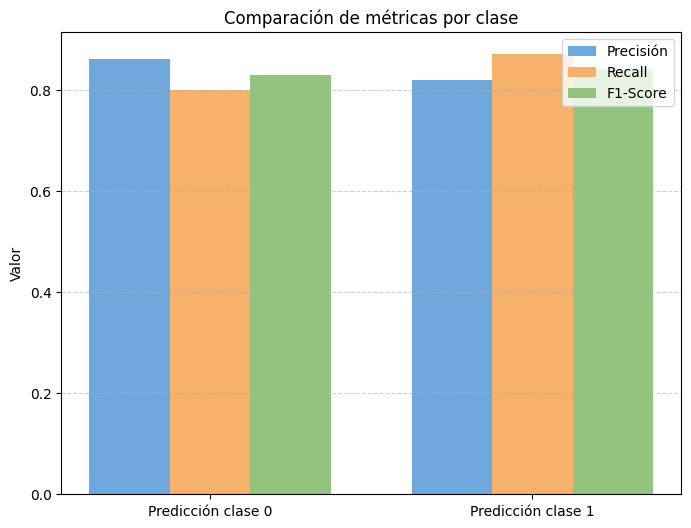

In [56]:
x = range(len(categorias))
ancho = 0.25

plt.figure(figsize=(8,6))
plt.bar([i - ancho for i in x], valores_precision, width=ancho, label="Precisión", color="#6FA8DC")
plt.bar(x, valores_recall, width=ancho, label="Recall", color="#F6B26B")
plt.bar([i + ancho for i in x], valores_f1, width=ancho, label="F1-Score", color="#93C47D")

plt.xticks(x, categorias)
plt.ylabel("Valor")
plt.title("Comparación de métricas por clase")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


###Gráfico de torta, distribución de aciertos por clase

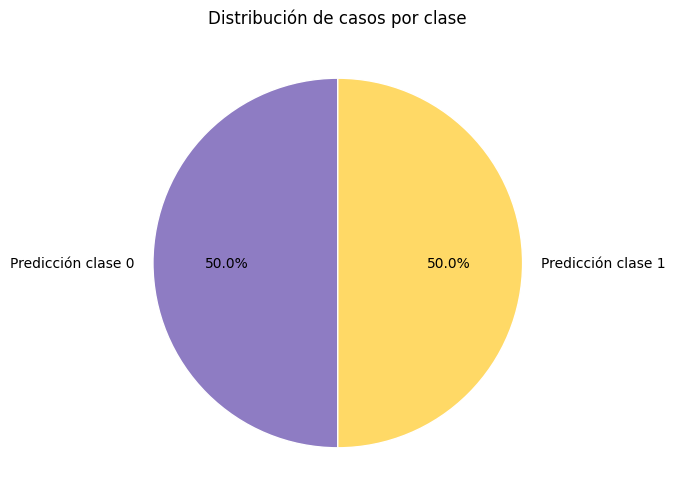

In [57]:
aciertos = [1549, 1549]  # soporte de cada clase
plt.figure(figsize=(6,6))
plt.pie(aciertos, labels=categorias, autopct="%1.1f%%", startangle=90,
        colors=["#8E7CC3", "#FFD966"], wedgeprops={"edgecolor":"white"})
plt.title("Distribución de casos por clase")
plt.show()




###Gráfico de barras, accuracy y promedios globales

Qué muestra: el desempeño global del modelo.

Interpretación: da la idea de qué tan bien clasifica en general, pero puede engañar si las clases están desbalanceadas.

Decisión: usarlo como referencia, pero mirar siempre también recall y F1 para no tomar una decisión basada solo en accuracy.


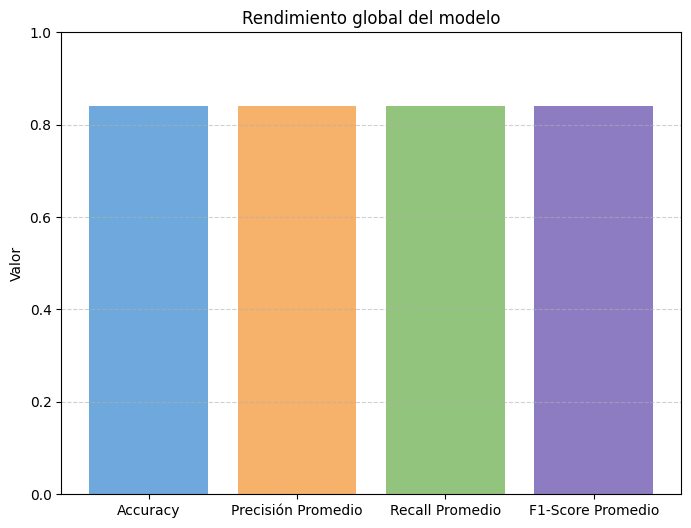

In [58]:
metricas_globales = ["Accuracy", "Precisión Promedio", "Recall Promedio", "F1-Score Promedio"]
valores_globales = [0.84, 0.84, 0.84, 0.84]

plt.figure(figsize=(8,6))
plt.bar(metricas_globales, valores_globales, color=["#6FA8DC","#F6B26B","#93C47D","#8E7CC3"])
plt.ylim(0,1)
plt.ylabel("Valor")
plt.title("Rendimiento global del modelo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()